<a href="https://colab.research.google.com/github/official-okello/DS_bootcamp_with_gomycode/blob/master/Microsoft_Malware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

***Feature -- Variable,Explanation***

**Wdft_IsGamer** - Indicates whether the device is a gamer device or not based on its hardware combination.

**Census_IsVirtualDevice** - Identifies a Virtual Machine (machine learning model)
**Census_OSEdition**,Edition of the current OS

**Census_HasOpticalDiskDrive** - True indicates that the machine has an optical disk drive (CD/DVD)

**Firewall** - "This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service."

**SMode** - "This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed"

**IsProtected** - "This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates"

**OsPlatformSubRelease** - "Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)"

**CountryIdentifier** - ID for the country the machine is located in

# Supervised Learning

## Import you data and perform basic data exploration phase

In [ ]:
#@title Load libraries
# !pip install ydata-profiling

In [ ]:
#@title Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [ ]:
#@title Load dataset
data = pd.read_csv('/content/Microsoft_malware_dataset_min.csv')
data.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [ ]:
#@title General info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [ ]:
#@title Descriptive
data.describe(include='all')

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
count,14730.000000,14730.000000,14730.000000,14730,14730.000000,14730.000000,14730.000000,14730.000000,14730,14730.00000
unique,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,9,NaN
top,NaN,NaN,NaN,Core,NaN,NaN,NaN,NaN,rs4,NaN
freq,NaN,NaN,NaN,5319,NaN,NaN,NaN,NaN,4501,NaN
mean,0.473320,0.358656,0.027088,NaN,0.217990,0.909980,0.002037,0.834623,NaN,110.79484
std,0.499305,0.479622,0.162344,NaN,0.412895,0.286221,0.045085,0.371533,NaN,62.77533
min,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.00000
25%,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,1.000000,NaN,56.00000
50%,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,1.000000,NaN,104.00000
75%,1.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000,1.000000,NaN,164.00000


In [ ]:
#@title Pandas profiling
# profile = ProfileReport(data, title="Microsoft malware dataset min")
# profile.to_file("Microsoft_malware_dataset.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:01<00:00,  5.22it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#@title Handle Missing and corrupted values
# data.isnull().sum()
data.dropna(inplace=True)

In [ ]:
#@title Remove duplicates
# data.duplicated().sum()
data.drop_duplicates(inplace=True)

<Axes: >

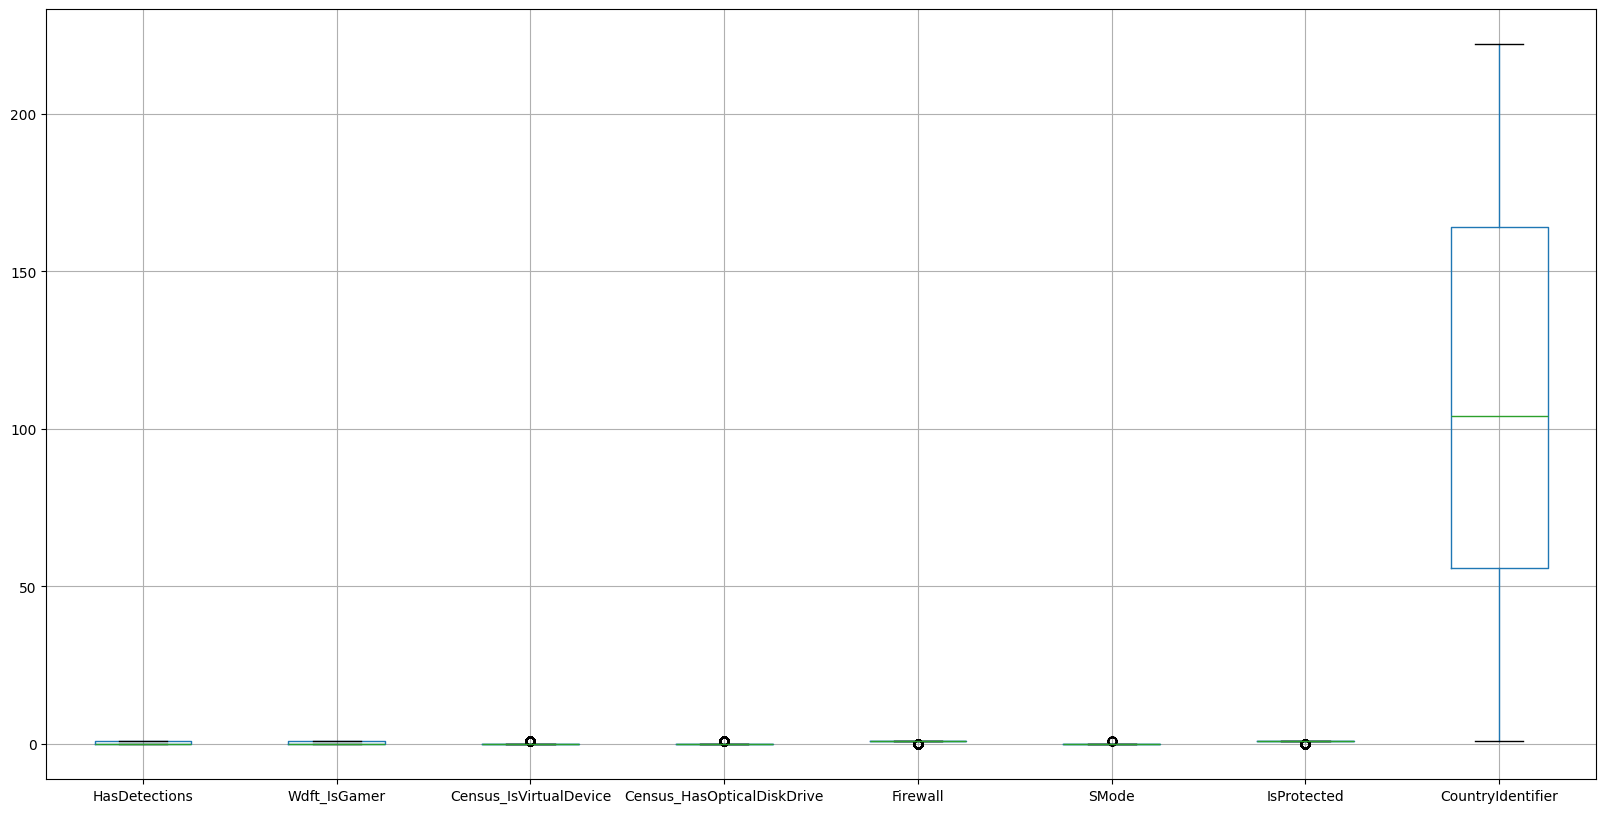

In [ ]:
#@title Plot outliers
data.boxplot(figsize=(20,10))

In [ ]:
#@title Encode categorical features
le = LabelEncoder()
data['OsPlatformSubRelease'] = le.fit_transform(data['OsPlatformSubRelease'])
data['Census_OSEdition'] = le.fit_transform(data['Census_OSEdition'])

## Prepare dataset for the modelling phase

In [ ]:
#@title Identify feature variables and target

# Unsupervised learning

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (121). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


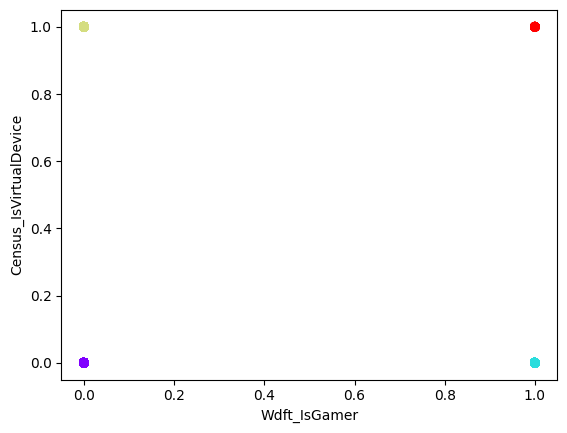

In [ ]:
from math import sqrt
#@title Apply K means clustering and plot the clusters
cluster_data = data[['Wdft_IsGamer','Census_IsVirtualDevice']]
k = int(np.sqrt(len(data)))
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(cluster_data)

#plot clusters
plt.scatter(data['Wdft_IsGamer'], data['Census_IsVirtualDevice'], c=clusters, cmap='rainbow')
plt.xlabel('Wdft_IsGamer')
plt.ylabel('Census_IsVirtualDevice')
plt.show()

K = 1, WCSS = 3776.41
K = 2, WCSS = 384.42
K = 3, WCSS = 29.83
K = 4, WCSS = 0.00
K = 5, WCSS = 0.00
K = 6, WCSS = 0.00
K = 7, WCSS = 0.00
K = 8, WCSS = 0.00
K = 9, WCSS = 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:

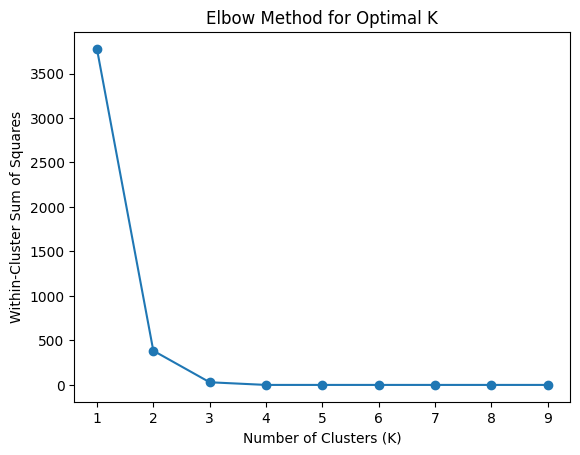

In [ ]:
#@title Finding the best value of K
# wcss -> Within-Cluster Sum of Squares
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
    print(f"K = {k}, WCSS = {kmeans.inertia_:.2f}")
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method for Optimal K')
plt.show()